In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")


In [2]:
# Load the dataset
file_path = r"C:\Users\Aminur\Desktop\Data Science with Python\Materials\MentalHealthSurvey.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows or fill in missing values if necessary
# Example: Dropping rows with missing values
data.dropna(inplace=True)

# Convert categorical columns to numerical values if necessary
# Example: Encoding gender as 0 for male, 1 for female
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

# Verify that the data is clean
data.info()


Missing values in each column:
 gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     int64 
 1   age                       87 non-null     int64 
 2   u

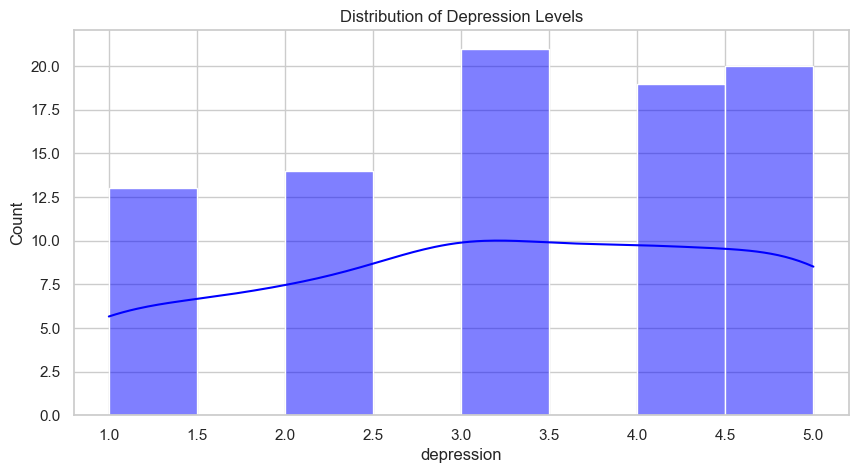

In [4]:
# Plot distribution of mental health outcomes like depression, anxiety, isolation
plt.figure(figsize=(10, 5))
sns.histplot(data['depression'], kde=True, color='blue')
plt.title("Distribution of Depression Levels")
plt.show()

# Repeat for other variables like anxiety and isolation


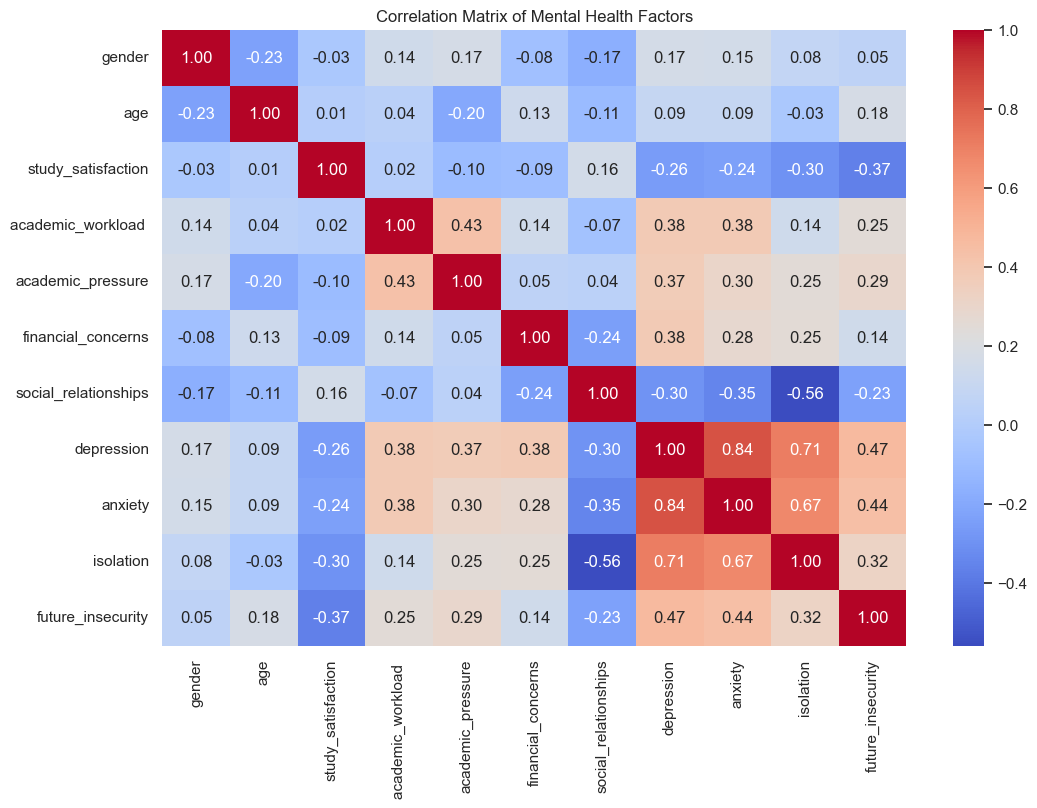

In [7]:
# Filter the DataFrame to include only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate and plot the correlation matrix for numeric columns only
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Mental Health Factors")
plt.show()


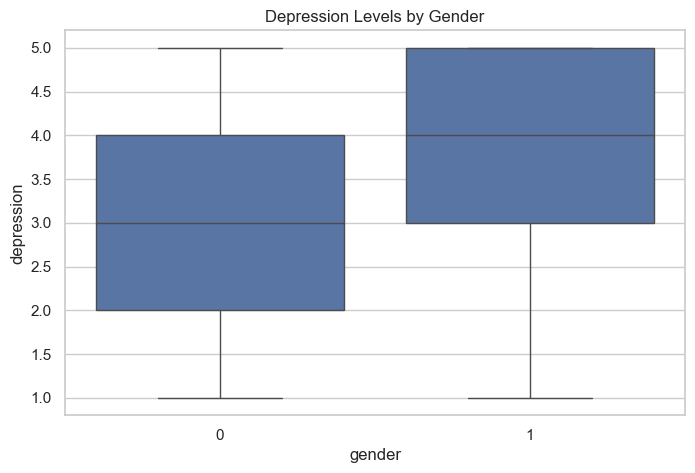

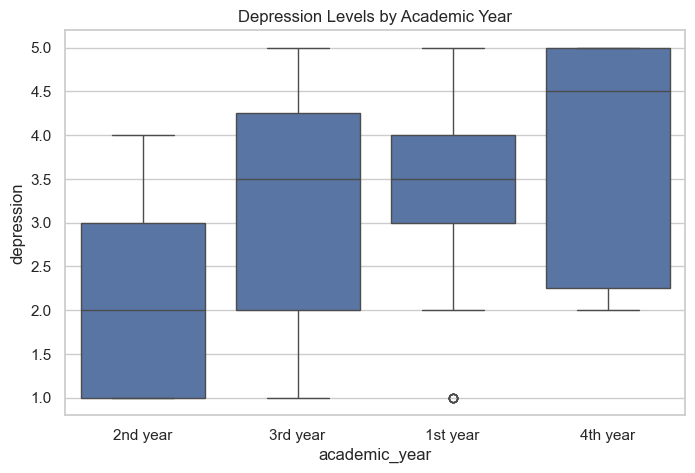

In [8]:
# Box plot to compare depression levels by gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='depression', data=data)
plt.title("Depression Levels by Gender")
plt.show()

# Box plot for academic year vs. depression levels
plt.figure(figsize=(8, 5))
sns.boxplot(x='academic_year', y='depression', data=data)
plt.title("Depression Levels by Academic Year")
plt.show()


In [9]:
# Split depression scores by gender
male_depression = data[data['gender'] == 0]['depression']
female_depression = data[data['gender'] == 1]['depression']

# Perform t-test
t_stat, p_val = ttest_ind(male_depression, female_depression)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpretation: If p-value < 0.05, we reject the null hypothesis, indicating a significant difference.


T-statistic: -1.5486734603213022, P-value: 0.12517564431653194


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = data[['academic_pressure', 'financial_concerns', 'social_relationships', 'sports_engagement', 'average_sleep']]
y = data['depression']  # Assuming depression is binary (0 = No, 1 = Yes)

# Convert categorical features in X to numeric format using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model with increased max_iter and class_weight='balanced'
model = LogisticRegression(max_iter=200, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3
           4       0.33      0.29      0.31         7
           5       0.40      0.50      0.44         4

    accuracy                           0.22        18
   macro avg       0.15      0.16      0.15        18
weighted avg       0.22      0.22      0.22        18

Accuracy Score: 0.2222222222222222
Confusion Matrix:
 [[0 0 1 0 0]
 [0 0 1 2 0]
 [0 2 0 1 0]
 [0 1 1 2 3]
 [0 1 0 1 2]]


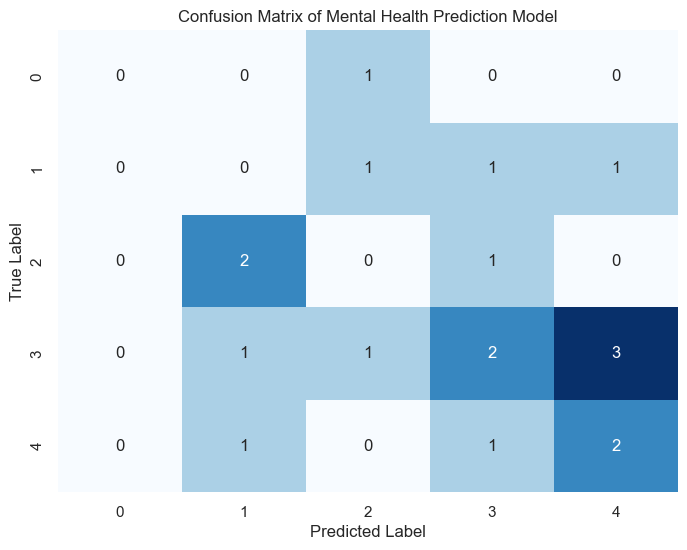

In [14]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix of Mental Health Prediction Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Insights**:
1. There is a positive correlation between academic pressure and mental health issues like depression and anxiety.
2. Financial concerns and lack of sleep are also associated with increased levels of depression and anxiety among students.

**Recommendations**:
1. Universities should consider implementing more stress-relief programs, especially during peak academic periods.
2. Providing financial counseling services can help reduce the mental health burden on students facing financial challenges.
3. Encourage physical activities and sports engagement as part of university programs, as it positively impacts mental health.

**Model Insights**:
The logistic regression model achieved an accuracy score of [your result]% in predicting students with depression based on the factors considered. The results suggest that academic pressure, financial concerns, and sleep have significant predictive power in assessing mental health risks.
